In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package

# Class 9 - DST Lab Spring 2022
## New York University

# Test signal from last week

In [2]:
def sine_gen(amplitude, frequency, phase, duration, sample_rate):
    t_v = np.arange(0, duration, 1/sample_rate) 
    output = amplitude * np.sin(2 * np.pi * frequency * t_v + phase)
    return output

(0.0, 1000.0)

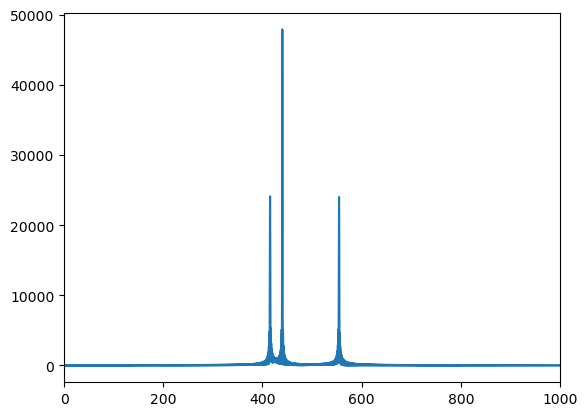

In [3]:
sr = 48000

sine1 = sine_gen(1, 440, 0, 2, sr) # A4
sine2 = sine_gen(1, 554.37, 0, 1, sr) # C#5
sine3 = sine_gen(1, 415.3, 0, 1, sr) # G#4

melody = np.zeros(3*sr)

melody[0:sr*2] = melody[0:sr*2] + sine1
melody[sr:sr*2] = melody[sr:sr*2] + sine2
melody[sr*2:] = melody[sr*2:] + sine3

display(Audio(melody, rate = sr))

melody_fft = np.fft.rfft(melody)

melody_mag = np.abs(melody_fft)

melody_freq = np.fft.rfftfreq(len(melody), 1/sr)

plt.plot(melody_freq, melody_mag)
plt.xlim([0, 1000]) 

## Intro to spectrogram - Buffers of Time

In order to analyze the development of the frequency content of a signal over time, the audio vector will have to be broken into smaller "chunks" of data.

 - Create a function that generates a matrix that contains a signal broken into buffers.
 - Each column of the matrix will represent a different moment in time
 - The length of each column (number of rows) will be defined by the user

In [6]:
def fft_buf(x, buffer_length, display_num):
    num_buffers = int(np.ceil(len(x) / buffer_length))  # ceil rounds up, int converts 
                                                        #output to integer type
    print(num_buffers)
    output = np.zeros([num_buffers, buffer_length])
    for i in range(0, num_buffers):
        start = i * buffer_length
        end = start + buffer_length
        curr_frame = x[start:end]
        output[i, 0:len(curr_frame)] = curr_frame
    
    buffer_fft = np.fft.rfft(output[display_num])
    
    mag_fft = abs(buffer_fft)
    
    f_v = np.fft.rfftfreq(len(output[display_num]), 1/48000)
    
    plt.stem(f_v, mag_fft)
    
    return mag_fft

282


(0.0, 800.0)

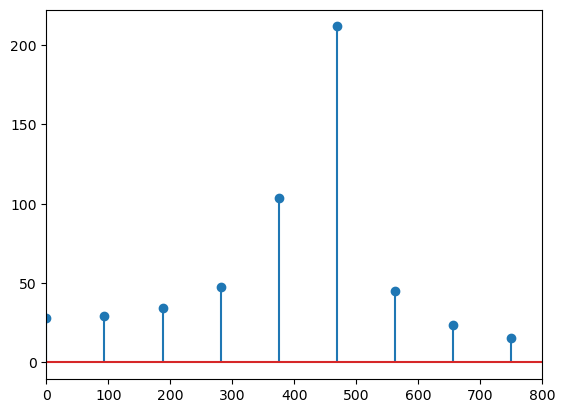

In [8]:
melody_fft = fft_buf(melody, 512, 10)
plt.xlim([0, 800])

## Zero Padding

    -pad each buffer with zeros so we can perform an FFT with a larger N value on the same signal
    
    if buffer_length is less than ffft_len, add zeros onto end of curr_frame to match buffer_length
    
    potentially useful functions:
    
    np.append
    np.concatenate

In [12]:
def fft_buf_zpad(x, buffer_length, display_num, fft_len):
    num_buffers = int(np.ceil(len(x) / buffer_length))  # ceil rounds up, int converts 
                                                        #output to integer type
    print(num_buffers)
    output = np.zeros([num_buffers, buffer_length])
    for i in range(0, num_buffers):
        start = i * buffer_length
        end = start + buffer_length
        curr_frame = x[start:end]
        output[i, 0:len(curr_frame)] = curr_frame
    
    buffer_fft = np.fft.rfft(output[display_num], fft_len)
    
    mag_fft = abs(buffer_fft)
    
    f_v = np.fft.rfftfreq(fft_len, 1/48000)
    
    plt.stem(f_v, mag_fft)
    
    return mag_fft

282


(0.0, 800.0)

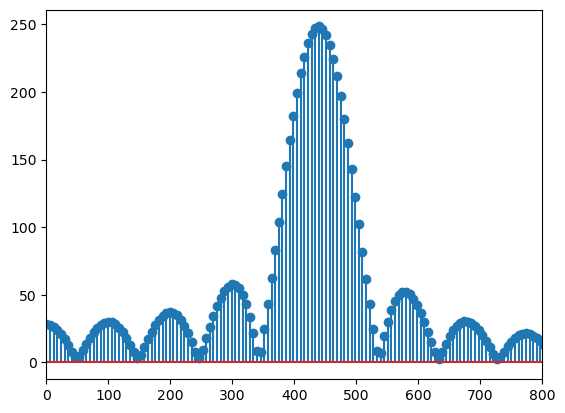

In [25]:
buffer_size = 512
fft_size = 8192
x_fft = fft_buf_zpad(melody, buffer_size, 10, fft_size)
plt.xlim(0, 800)

In [9]:
help(np.fft.rfft)

Help on function rfft in module numpy.fft:

rfft(a, n=None, axis=-1, norm=None)
    Compute the one-dimensional discrete Fourier Transform for real input.
    
    This function computes the one-dimensional *n*-point discrete Fourier
    Transform (DFT) of a real-valued array by means of an efficient algorithm
    called the Fast Fourier Transform (FFT).
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        Number of points along transformation axis in the input to use.
        If `n` is smaller than the length of the input, the input is cropped.
        If it is larger, the input is padded with zeros. If `n` is not given,
        the length of the input along the axis specified by `axis` is used.
    axis : int, optional
        Axis over which to compute the FFT. If not given, the last axis is
        used.
    norm : {"backward", "ortho", "forward"}, optional
        .. versionadded:: 1.10.0
    
        Normalization mode (see `nump

## Windowing

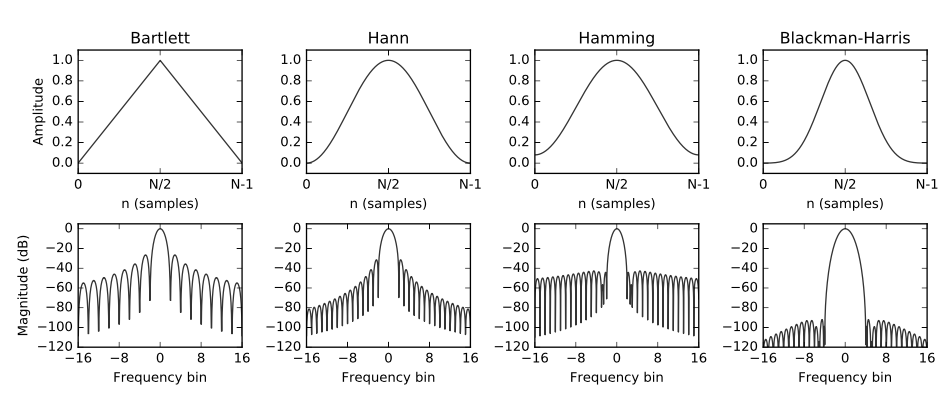
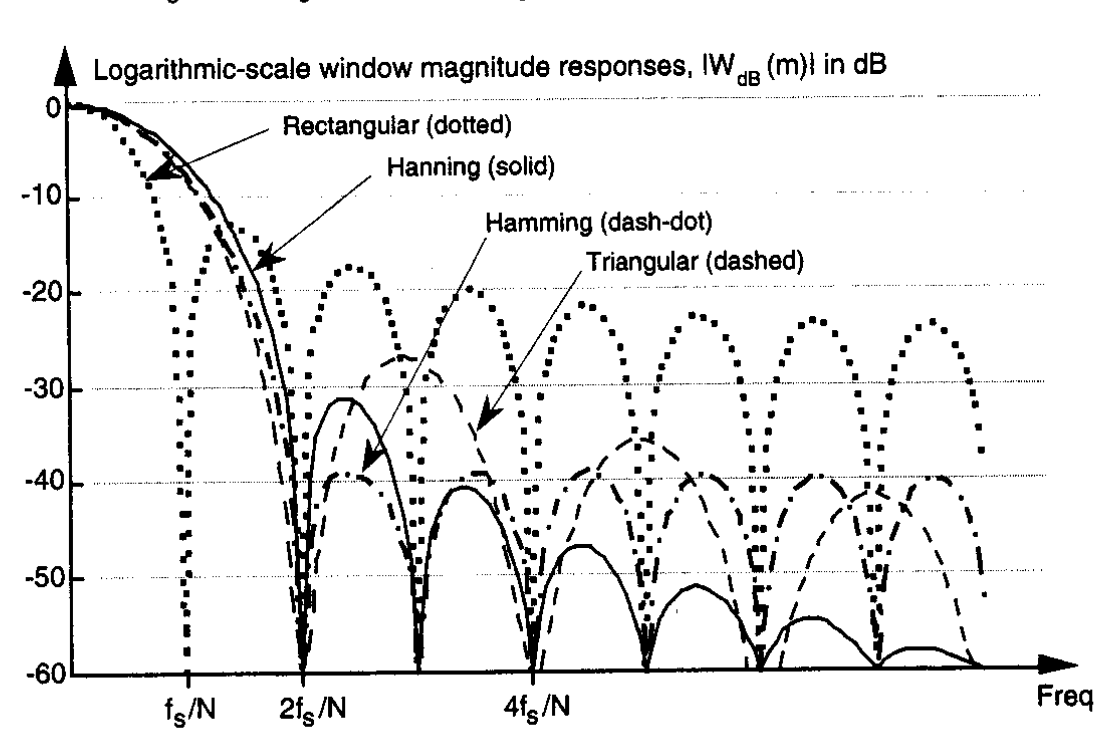

### Applying Envelopes - Fade In

In [ ]:
# rectangular window

In [33]:
frame = melody[8192:16384]
sr = 48000

Audio(frame, rate = sr)

In [31]:
# fade in over 8192 samples

# series of numbers that start at 0 and end at 1
# we want 8192 numbers in this series

# [ 0, 1/8192, 2/8192, 3/8192, ... 8192/8192]

# for loop
# for i in range(0, 8192):
    # do something with i here
    
# linspace
ramp = np.linspace(0, 1, 8192)
print(ramp)
print(1/8192)

[0.00000000e+00 1.22085215e-04 2.44170431e-04 ... 9.99755830e-01
 9.99877915e-01 1.00000000e+00]
0.0001220703125


In [36]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

In [39]:
print(np.linspace(1, 0, 10))

[1.         0.88888889 0.77777778 0.66666667 0.55555556 0.44444444
 0.33333333 0.22222222 0.11111111 0.        ]


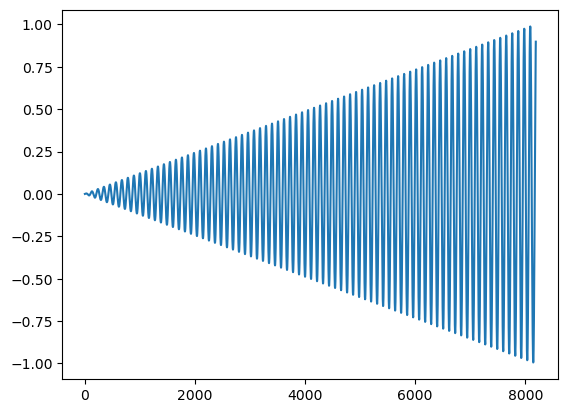

In [34]:
fade_in = frame * ramp
plt.plot(fade_in)
Audio(fade_in, rate = sr)

### Trapezoidal window
our frame is 8192 samples long

fade in for quarter frame: 8192/4 samples in this section of envelope

hold at one for half frame

fade out for quarter frame

In [44]:
print(8192/2) # this line returns a float, we want an int
print(int(8192/2)) # this line converts output to an int before printing
print(8192//2)

4096.0
4096
4096


In [45]:
fade_in = np.linspace(0, 1, 8192//4)
hold = np.ones(8192//2)
fade_out = np.linspace(1, 0, 8192//4)

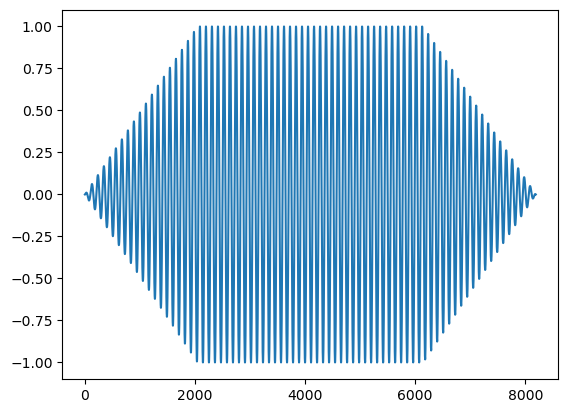

In [47]:
trapezoidal = np.concatenate([fade_in, hold, fade_out])

trapezoidal_frame = frame * trapezoidal

plt.plot(trapezoidal_frame)

Audio(trapezoidal_frame, rate = sr)

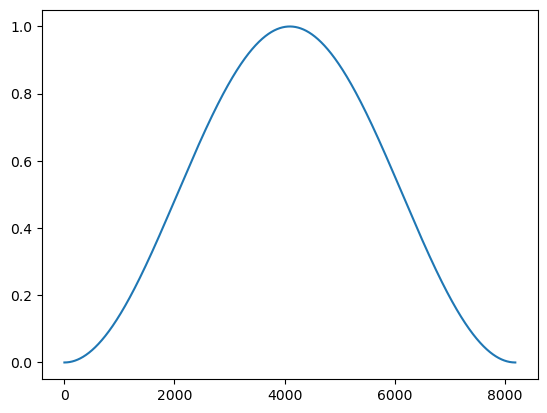

In [49]:
# hanning window
# help(np.hanning)
win_han = np.hanning(8192)
plt.plot(win_han)

In [50]:
frame_han = frame * win_han
Audio(frame_han, rate=sr)

### Non-overlapping STFT With Hanning window
Create a function that breaks an audio signal into chunks of audio and displays the fourier transform of ONE given buffer (Freq vs Amplitude) while applying the following window:

- ‘hanning’

Inputs:

- x [mono audio vector]
- frame_size [frame/buffer size]
- frame_num [frame/buffer to display]

In [51]:
def fft_buf_hann(x, buffer_length, display_num, fft_len):
    num_buffers = int(np.ceil(len(x) / buffer_length))  # ceil rounds up, int converts 
                                                        #output to integer type
    print(num_buffers)
    output = np.zeros([num_buffers, buffer_length])
    for i in range(0, num_buffers):
        start = i * buffer_length
        end = start + buffer_length
        curr_frame = x[start:end] # apply window to this frame
        window = np.hanning(len(curr_frame))
        curr_frame = curr_frame * window
        output[i, 0:len(curr_frame)] = curr_frame
    
    buffer_fft = np.fft.rfft(output[display_num], fft_len)
    
    mag_fft = abs(buffer_fft)
    
    f_v = np.fft.rfftfreq(fft_len, 1/48000)
    
    plt.stem(f_v, mag_fft)
    
    return mag_fft

282


(0.0, 800.0)

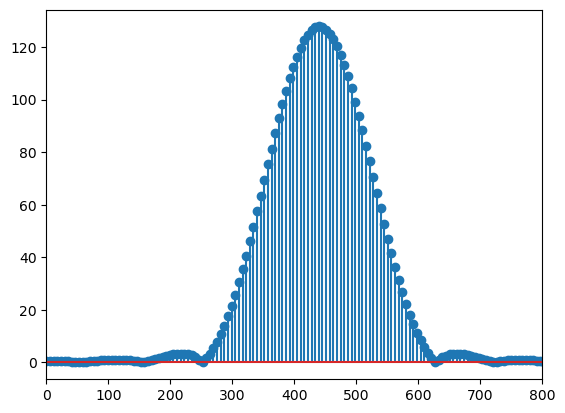

In [52]:
buffer_size = 512

fft_size = 8192

x_fft = fft_buf_hann(melody, buffer_size, 10, fft_size)
plt.xlim([0, 800])

282
282


(0.0, 800.0)

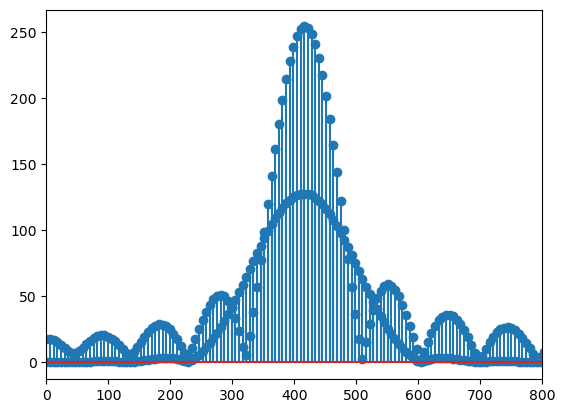

In [53]:
# plotting hanning vs rect

buffer_s = 512

fft_size = 8192

x_fft_hann = fft_buf_hann(melody,buffer_s,200, fft_size)

x_fft_rect = fft_buf_zpad(melody,buffer_s,200, fft_size)

f_v = np.arange(0,sr,sr/(fft_size))

plt.cla()
plt.stem(f_v[0:len(x_fft_hann)], x_fft_hann)
plt.stem(f_v[0:len(x_fft_hann)],x_fft_rect)
plt.xlim([0,800])

# STFT with configurable window

Create a function that breaks an audio signal into chunks of audio and displays the fourier transform of ONE given buffer (Freq vs Amplitude) while applying one of the following windows:

- ‘rectangular’
- ‘hamming’
- ‘hanning’
- ‘blackman’

Inputs:

- x [mono audio vector]
- buff_sz [frame/buffer size]
- frame [frame/buffer to display]
- win [type of window]

# Spectrogram

In [54]:
def frame(y, frame_length=1024, hop_length=512):
    '''Slice a time series into overlapping frames.

    This implementation uses low-level stride manipulation to avoid
    redundant copies of the time series data.

    Parameters
    ----------
    y : np.ndarray [shape=(n,)]
        Time series to frame. Must be one-dimensional and contiguous
        in memory.

    frame_length : int > 0 [scalar]
        Length of the frame in samples

    hop_length : int > 0 [scalar]
        Number of samples to hop between frames

    Returns
    -------
    y_frames : np.ndarray [shape=(frame_length, N_FRAMES)]
        An array of frames sampled from `y`:
        `y_frames[i, j] == y[j * hop_length + i]`

    Raises
    ------
    ParameterError
        If `y` is not contiguous in memory, not an `np.ndarray`, or
        not one-dimensional.  See `np.ascontiguous()` for details.

        If `hop_length < 1`, frames cannot advance.

        If `len(y) < frame_length`.

    Examples
    --------
    Extract 2048-sample frames from `y` with a hop of 64 samples per frame

    >>> y, sr = librosa.load(librosa.util.example_audio_file())
    >>> librosa.util.frame(y, frame_length=2048, hop_length=64)
    array([[ -9.216e-06,   7.710e-06, ...,  -2.117e-06,  -4.362e-07],
           [  2.518e-06,  -6.294e-06, ...,  -1.775e-05,  -6.365e-06],
           ...,
           [ -7.429e-04,   5.173e-03, ...,   1.105e-05,  -5.074e-06],
           [  2.169e-03,   4.867e-03, ...,   3.666e-06,  -5.571e-06]], dtype=float32)

    '''

    if not isinstance(y, np.ndarray):
        raise ParameterError('Input must be of type numpy.ndarray, '
                             'given type(y)={}'.format(type(y)))

    if y.ndim != 1:
        raise ParameterError('Input must be one-dimensional, '
                             'given y.ndim={}'.format(y.ndim))

    if len(y) < frame_length:
        raise ParameterError('Buffer is too short (n={:d})'
                             ' for frame_length={:d}'.format(len(y), frame_length))

    if hop_length < 1:
        raise ParameterError('Invalid hop_length: {:d}'.format(hop_length))

    if not y.flags['C_CONTIGUOUS']:
        raise ParameterError('Input buffer must be contiguous.')

    # Compute the number of frames that will fit. The end may get truncated.
    n_frames = 1 + int((len(y) - frame_length) / hop_length)

    # Vertical stride is one sample
    # Horizontal stride is `hop_length` samples
    y_frames = np.lib.stride_tricks.as_strided(y, shape=(frame_length, n_frames),
                          strides=(y.itemsize, hop_length * y.itemsize))
    return y_frames

In [55]:
def ov_spec(x,frame_s):
    #Generating overlapped matrix
    mat = frame(x,frame_s,int(frame_s/2))
    
    #Place Holder
    place_h = np.zeros(np.shape(mat))
    
    win = np.hanning(frame_s) # hanning window
    # win = np.ones(frame_s) # rectangular window
    
    
    for i in range(0, np.shape(mat)[1]):
        place_h[:,i] = mat[:,i]*win
    
    return 10*np.log(np.abs(np.fft.fft(place_h,axis=0)))
    

(0.0, 800.0)

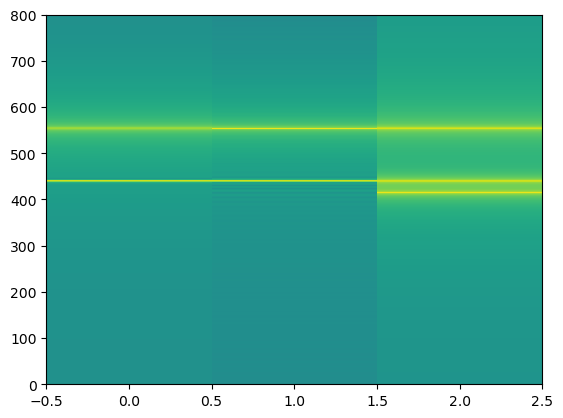

In [66]:
#spectrogram of melody from above
sr = 48000

frame_size = 4096*16

melody_spec = ov_spec(melody,frame_size)

# Adjust axis
f_v = np.arange(0,sr,sr/frame_size)

t_v = np.arange(0,len(melody)/sr,len(melody)/sr/np.shape(melody_spec)[1])

plt.pcolormesh(t_v,f_v,melody_spec,shading = 'nearest')
plt.ylim([0,800])


(0.0, 1.0)

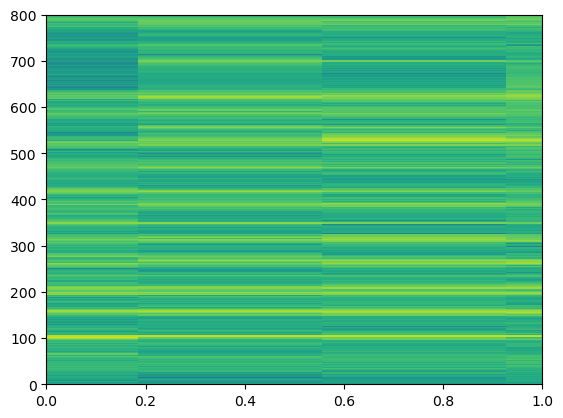

In [75]:
sine_1, sr = sf.read("sig.wav")

frame_size = 8192*4

spec_3 = ov_spec(sine_1,frame_size)

# Adjust axis
f_v = np.arange(0,sr,sr/frame_size)

t_v = np.arange(0,len(sine_1)/sr,len(sine_1)/sr/np.shape(spec_3)[1])

plt.pcolormesh(t_v,f_v,spec_3,shading = 'nearest')
plt.ylim(0, 800)
plt.xlim(0, 1)


# Convolution

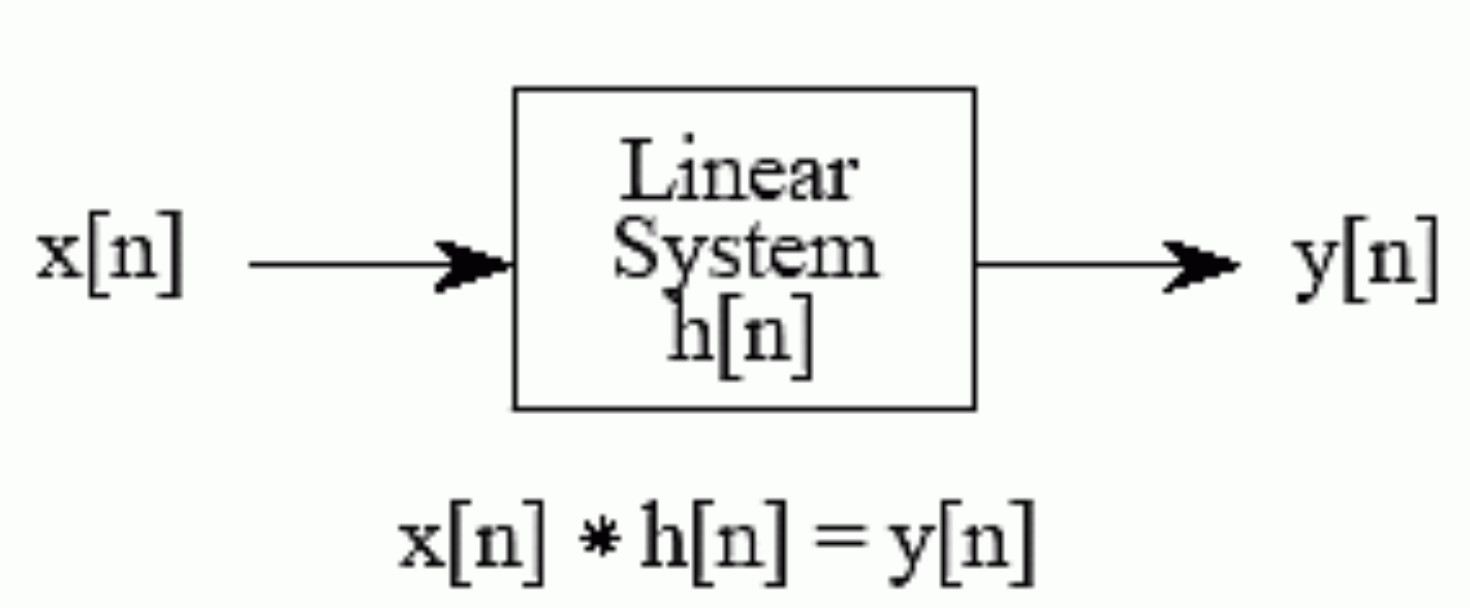

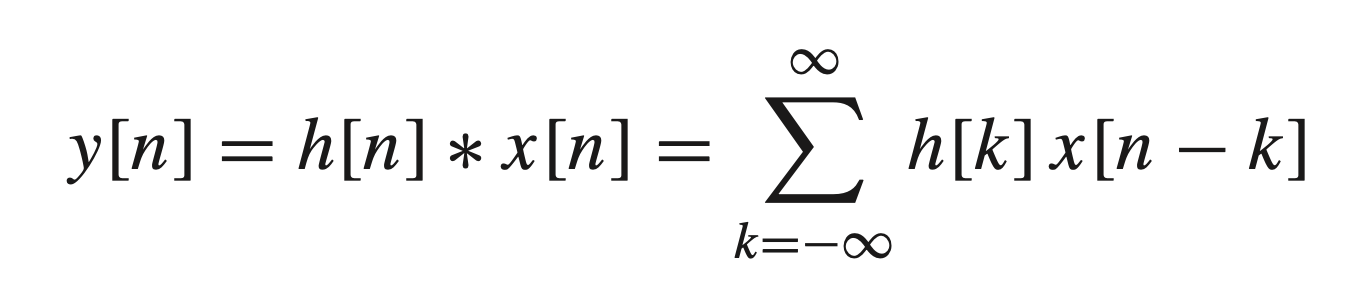

https://lpsa.swarthmore.edu/Convolution/CI.html

# Task: Indexing Excercise - Direct Convolution

x = series of numbers describing input signal

h = series of numbers describing what a system will do to an input pulse 
   (all h can do is scale and time-shift copies of input pulses)

len(y) = len(x) + len(h) - 1

x[n] = [1,1,4,2]

h[n] = [1,0,2,0,3]

y[n] = x[n] * h[n]

In [78]:
y = np.array([0, 0, 0, 0, 0, 0, 0, 0])
y += [1, 1, 4, 2, 0, 0, 0, 0] #imagine h[n] = [1, 0, 0, 0, 0]
y += [0, 0, 0, 0, 0, 0, 0, 0] #imagine h[n] = [0, 0, 0, 0, 0]
y += [0, 0, 2, 2, 8, 4, 0, 0] #imagine h[n] = [0, 0, 2, 0, 0]
y += [0, 0, 0, 0, 0, 0, 0, 0] #imagine h[n] = [0, 0, 0, 0, 0]
y += [0, 0, 0, 0, 3, 3, 12, 6] #imagine h[n] = [0, 0, 0, 0, 3]
print(y)

[ 1  1  6  4 11  7 12  6  0]


In [76]:
x = np.array([1,1,4,2])
h = np.array([1,0,2,0,3])
u = np.convolve(x,h)
print('Convolution result:',u)

Convolution result: [ 1  1  6  4 11  7 12  6]


In [79]:
def fast_conv(x,h):
    
    #Zero padding
    
    #Zero pad x
    x_p = np.pad(x, [0,len(h)-1])
    print(x_p)
    
    #Zero pad y
    h_p = np.pad(h,[0, len(x)-1])
    print(h_p)
    
    #Fast Fourier
    X = np.fft.fft(x_p)
    H = np.fft.fft(h_p)
    
    #Multiplication
    Y = X*H
    
    #Inverse FFT
    y_i = np.fft.ifft(Y)
    
    #Remove imaginary 0
    
    y = np.real(y_i)
    
    return y


In [87]:
x_s, sr = sf.read('Snare.wav')

x = x_s[:,0]
    
# h = np.zeros(2 * 48000)
# h[0] = 3
# h[29999] = 1
# h[47999] = 0.5
# h[47999 + 48000] = 0.3
# myDecays = h



myDecays = np.random.normal(0, 20000, 1000)
myDecays[0] = 1

for i in range(len(myDecays)):
    if (myDecays[i] > 0 and myDecays[i] < 96000):
        h[int(myDecays[i])] = 0.000001 * (1 - myDecays[i]/96000)
# h[0] = 1
# h[29999] = 2
# h[47999] = 0.5
# h[47999 + 48000] = 0.3
y = fast_conv(x, myDecays)
Audio(y, rate = sr)

[-0.00686646 -0.01577759 -0.04364014 ...  0.          0.
  0.        ]
[1.00000000e+00 1.58189519e+04 8.00944858e+03 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [ ]:
# applying impuse response to snare drum recording 


## Task - Fast Convolution

- Convolution in Time Domain is equivalent to multiplication in Frequency Domain

and 

- Multiplication in Time Domain is equivalent to Convolution in Frequency Domain



In [ ]:
x = np.array([1,1,4,2])
h = np.array([1,0,2,0,3])
u = np.convolve(x,h)
print('Convolution result:',u)

## A very naive reverb



In [ ]:
print(np.random.normal(0, 48000, 10))

In [ ]:
x_s, sr = sf.read('Snare.wav')

x = x_s[:,0]
    
h = np.zeros(2 * 48000)
h[0] = 1
h[48000] = 1
myDecays = h

# myDecays = np.random.normal(0, 20000, 10000)
# myDecays[0] = 1

for i in range(len(myDecays)):
    if (myDecays[i] > 0 and myDecays[i] < 96000):
        h[int(myDecays[i])] = 0.000001 * (1 - myDecays[i]/96000)
# h[0] = 1
# h[29999] = 2
# h[47999] = 0.5
# h[47999 + 48000] = 0.3

In [ ]:
y = fast_conv(x, h)
Audio(y, rate = sr)